In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.lines import Line2D
import statsmodels.api as sm

In [2]:
columns = ["COD_HOSPITAL"
,"CIP_ENCRIPTADO"
,"SEXO"
,"FECHA_NACIMIENTO"
,"PROVINCIA"
,"COMUNA"
,"NACIONALIDAD"
,"PREVISION"
,"SERVICIO_SALUD"
,"TIPO_PROCEDENCIA"
,"TIPO_INGRESO"
,"ESPECIALIDAD_MEDICA"
,"TIPO_ACTIVIDAD"
,"FECHA_INGRESO"
,"SERVICIOINGRESO"
,"FECHAALTA"
,"SERVICIOALTA"
,"TIPOALTA"
,"DIAGNOSTICO1"
,"DIAGNOSTICO2"
,"DIAGNOSTICO3"
,"DIAGNOSTICO4"
,"DIAGNOSTICO5"
,"DIAGNOSTICO6"
,"DIAGNOSTICO7"
,"DIAGNOSTICO8"
,"DIAGNOSTICO9"
,"DIAGNOSTICO10"
,"PROCEDIMIENTO1"
,"PROCEDIMIENTO2"
,"PROCEDIMIENTO3"
,"PROCEDIMIENTO4"
,"PROCEDIMIENTO5"
,"PROCEDIMIENTO6"
,"PROCEDIMIENTO7"
,"PROCEDIMIENTO8"
,"PROCEDIMIENTO9"
,"PROCEDIMIENTO10"
,"USOSPABELLON"
,"IR_29301_COD_GRD"
,"IR_29301_PESO"]

In [3]:
data = pd.read_csv(r'Datos\GRD_PUBLICO_2023.csv',sep='|',engine='python',encoding='utf-16', usecols=columns, na_values=["DESCONOCIDO"])

In [4]:
for col in ['FECHAALTA','FECHA_INGRESO','FECHA_NACIMIENTO']:
    data[col] = pd.to_datetime(data[col], errors='coerce')

C:\Users\benjo\AppData\Local\Temp\ipykernel_25480\3839240850.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[col] = pd.to_datetime(data[col], errors='coerce')


In [5]:
data.dropna(subset=['FECHA_INGRESO','FECHAALTA', 'FECHA_NACIMIENTO','PROVINCIA'], inplace=True, how='any')

In [6]:
date_cols = data[["FECHAALTA", "FECHA_INGRESO"]].copy()

for idx, row in date_cols.iterrows():
    if row['FECHAALTA'] < row['FECHA_INGRESO']:
        data.at[idx, 'FECHAALTA'], data.at[idx, 'FECHA_INGRESO'] = row['FECHA_INGRESO'], row['FECHAALTA']

In [7]:
data["DIAS_ESTANCIA"] = (data["FECHAALTA"] - data["FECHA_INGRESO"]).dt.days
data["EDAD"] = (data["FECHAALTA"] - data["FECHA_NACIMIENTO"]).dt.days // 365

In [8]:
data["IR_29301_PESO"] = data["IR_29301_PESO"].apply(lambda x: float(".".join(x.split(','))) if type(x) == str else x)

In [9]:
data.count()

COD_HOSPITAL           406321
CIP_ENCRIPTADO         405715
SEXO                   406299
FECHA_NACIMIENTO       406321
PROVINCIA              406321
COMUNA                 406321
NACIONALIDAD           406321
PREVISION              406308
SERVICIO_SALUD         406056
TIPO_PROCEDENCIA       406320
TIPO_INGRESO           406310
ESPECIALIDAD_MEDICA    406321
TIPO_ACTIVIDAD         406321
FECHA_INGRESO          406321
SERVICIOINGRESO        403370
FECHAALTA              406321
SERVICIOALTA           403776
TIPOALTA               406321
DIAGNOSTICO1           406321
DIAGNOSTICO2           351568
DIAGNOSTICO3           301356
DIAGNOSTICO4           250449
DIAGNOSTICO5           201306
DIAGNOSTICO6           158955
DIAGNOSTICO7           124049
DIAGNOSTICO8            96123
DIAGNOSTICO9            74456
DIAGNOSTICO10           57665
PROCEDIMIENTO1         406244
PROCEDIMIENTO2         374255
PROCEDIMIENTO3         338982
PROCEDIMIENTO4         306867
PROCEDIMIENTO5         276357
PROCEDIMIE

In [10]:
comuna = ['ANTÁRTICA']
SERVICIO_SALUD = ['AYSEN','MAGALLANES','CHILOÉ']

In [11]:
data = data[~data["COMUNA"].isin(comuna) & ~data["SERVICIO_SALUD"].isin(SERVICIO_SALUD)]

In [12]:
data.count()

COD_HOSPITAL           393535
CIP_ENCRIPTADO         392931
SEXO                   393514
FECHA_NACIMIENTO       393535
PROVINCIA              393535
COMUNA                 393535
NACIONALIDAD           393535
PREVISION              393522
SERVICIO_SALUD         393270
TIPO_PROCEDENCIA       393534
TIPO_INGRESO           393525
ESPECIALIDAD_MEDICA    393535
TIPO_ACTIVIDAD         393535
FECHA_INGRESO          393535
SERVICIOINGRESO        390591
FECHAALTA              393535
SERVICIOALTA           390994
TIPOALTA               393535
DIAGNOSTICO1           393535
DIAGNOSTICO2           340985
DIAGNOSTICO3           292163
DIAGNOSTICO4           242544
DIAGNOSTICO5           194714
DIAGNOSTICO6           153630
DIAGNOSTICO7           119793
DIAGNOSTICO8            92744
DIAGNOSTICO9            71795
DIAGNOSTICO10           55605
PROCEDIMIENTO1         393458
PROCEDIMIENTO2         362963
PROCEDIMIENTO3         329199
PROCEDIMIENTO4         297848
PROCEDIMIENTO5         268186
PROCEDIMIE

In [13]:
data.describe()

,COD_HOSPITAL,CIP_ENCRIPTADO,FECHA_NACIMIENTO,FECHA_INGRESO,FECHAALTA,PROCEDIMIENTO1,PROCEDIMIENTO2,PROCEDIMIENTO3,PROCEDIMIENTO4,PROCEDIMIENTO5,PROCEDIMIENTO6,PROCEDIMIENTO7,PROCEDIMIENTO8,PROCEDIMIENTO9,PROCEDIMIENTO10,USOSPABELLON,IR_29301_COD_GRD,IR_29301_PESO,DIAS_ESTANCIA,EDAD
count,393535.000000,3.929310e+05,393535,393535,393535,393458.000000,362963.000000,329199.000000,297848.000000,268186.000000,239201.000000,209963.000000,181385.000000,153654.000000,128256.000000,238696.000000,393526.000000,393526.000000,393535.00000,393535.000000
mean,113252.883606,7.843345e+07,1978-09-17 04:17:18.208037408,2023-04-27 07:05:16.140623360,2023-08-21 22:11:19.850076416,68.732376,76.388211,83.703365,86.690980,88.430555,89.148976,89.547642,89.471704,89.382768,89.178439,1.340115,90484.405302,0.963608,116.62921,44.469308
min,101100.000000,6.698809e+07,1918-01-21 00:00:00,2022-01-02 00:00:00,2023-01-01 00:00:00,0.090000,0.010000,0.010000,0.010000,0.010000,0.010000,0.090000,0.090000,0.090000,0.090000,0.000000,11011.000000,0.000000,0.00000,0.000000
25%,109100.000000,7.079453e+07,1956-08-24 00:00:00,2023-02-11 00:00:00,2023-07-01 00:00:00,51.230000,68.120000,87.440000,88.720000,89.130000,89.480000,89.520000,89.520000,89.520000,89.520000,1.000000,51112.000000,0.472600,49.00000,25.000000
50%,113180.000000,7.528079e+07,1978-10-02 00:00:00,2023-04-11 00:00:00,2023-09-06 00:00:00,75.340000,88.380000,90.520000,90.590000,91.330000,91.390000,91.390000,91.390000,91.330000,91.330000,1.000000,81073.000000,0.691500,107.00000,44.000000
75%,118100.000000,8.195321e+07,1998-01-19 00:00:00,2023-07-03 12:00:00,2023-11-06 00:00:00,88.720000,93.960000,99.190000,99.210000,99.210000,99.190000,99.190000,99.190000,99.180000,99.050000,1.000000,132130.000000,1.032800,176.00000,67.000000
max,133150.000000,1.008360e+08,2023-12-12 00:00:00,2023-12-12 00:00:00,2023-12-31 00:00:00,99.990000,99.990000,99.990000,99.990000,99.990000,99.990000,99.990000,99.990000,99.990000,99.990000,8.000000,990129.000000,20.646100,600.00000,105.000000
std,6380.189034,1.007963e+07,NaN,NaN,NaN,26.704932,27.721091,23.878046,20.777399,18.126726,16.865563,16.094993,16.138749,15.974125,16.155479,0.773517,62778.568614,1.099222,82.75879,25.710598


In [14]:
data['Multimorbilidad'] = data[['DIAGNOSTICO1', 'DIAGNOSTICO2', 'DIAGNOSTICO3', 
                                'DIAGNOSTICO4', 'DIAGNOSTICO5', 'DIAGNOSTICO6', 
                                'DIAGNOSTICO7', 'DIAGNOSTICO8', 'DIAGNOSTICO9', 
                                'DIAGNOSTICO10']].notnull().sum(axis=1)

data['Multimorbilidad'] = (data['Multimorbilidad'] > 1).astype(int)


In [15]:
data['DIAGNOSTICOx'] = data["DIAGNOSTICO1"].apply(lambda x: str(x).split(".")[0])

In [16]:
enfermedades_cardiovasculares = ['I01', 'I05', 'I06', 'I07', 'I08', 'I09', 'I10', 'I11', 'I12', 'I13', 'I14', 'I15', 'I20', 'I21', 'I22', 'I23', 'I24', 'I25', 'I26', 'I27', 'I28', 'I30', 'I31', 'I32', 'I33', 'I34', 'I35', 'I36', 'I37', 'I38', 'I39', 'I40', 'I41', 'I42', 'I43', 'I44', 'I45', 'I46', 'I47', 'I48', 'I49', 'I50', 'I51', 'I52', 'I60', 'I61', 'I62', 'I63', 'I64', 'I65', 'I66', 'I67', 'I68', 'I69', 'I70', 'I71', 'I72', 'I73', 'I74', 'I75', 'I76', 'I77', 'I78', 'I79', 'I80', 'I81', 'I82', 'I83', 'I84', 'I85', 'I86', 'I87', 'I88', 'I89', 'I95', 'I96', 'I97', 'I98', 'I99', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28']


In [17]:
data['Cardiovascular'] = (data[data[["DIAGNOSTICO1", "DIAGNOSTICO2", "DIAGNOSTICO3"]].isin(enfermedades_cardiovasculares)].notnull().sum(axis=1) > 0).astype(int)

In [18]:
dataog = data.copy()

In [19]:
def no_outliers(data, column):
    print(column)
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [20]:
for column in ["DIAS_ESTANCIA", "IR_29301_PESO"]:
    data = no_outliers(data, column)
print((dataog.count() - data.count())/ dataog.count())


DIAS_ESTANCIA
IR_29301_PESO
COD_HOSPITAL           0.076857
CIP_ENCRIPTADO         0.076886
SEXO                   0.076854
FECHA_NACIMIENTO       0.076857
PROVINCIA              0.076857
COMUNA                 0.076857
NACIONALIDAD           0.076857
PREVISION              0.076857
SERVICIO_SALUD         0.076807
TIPO_PROCEDENCIA       0.076857
TIPO_INGRESO           0.076859
ESPECIALIDAD_MEDICA    0.076857
TIPO_ACTIVIDAD         0.076857
FECHA_INGRESO          0.076857
SERVICIOINGRESO        0.075852
FECHAALTA              0.076857
SERVICIOALTA           0.076349
TIPOALTA               0.076857
DIAGNOSTICO1           0.076857
DIAGNOSTICO2           0.087520
DIAGNOSTICO3           0.099109
DIAGNOSTICO4           0.113530
DIAGNOSTICO5           0.131721
DIAGNOSTICO6           0.151793
DIAGNOSTICO7           0.173282
DIAGNOSTICO8           0.197242
DIAGNOSTICO9           0.221422
DIAGNOSTICO10          0.246111
PROCEDIMIENTO1         0.076872
PROCEDIMIENTO2         0.082198
PROCEDIMIENT

<Axes: xlabel='IR_29301_PESO', ylabel='Count'>

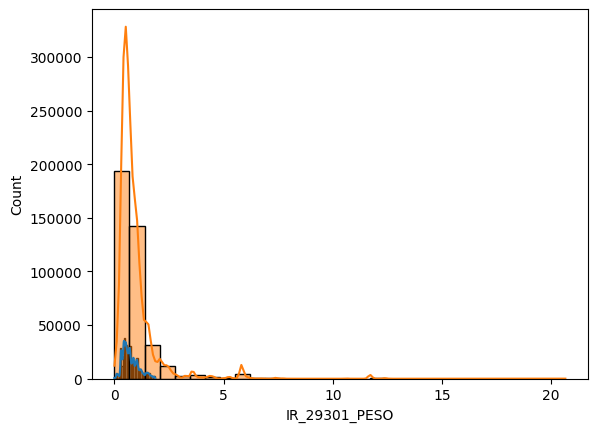

In [21]:
sns.histplot(data['IR_29301_PESO'], bins=30, kde=True)
sns.histplot(dataog['IR_29301_PESO'], bins=30, kde=True)

<Axes: xlabel='IR_29301_PESO', ylabel='Count'>

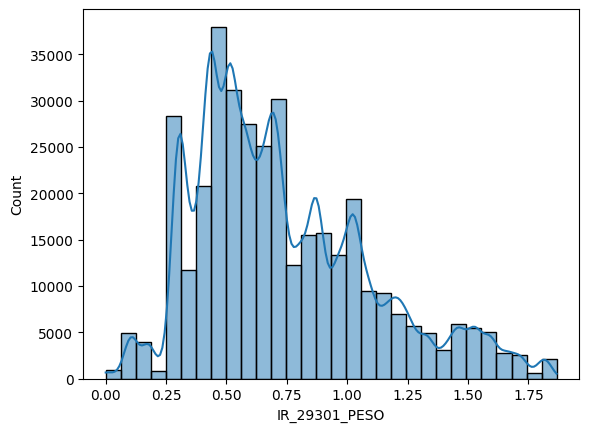

In [22]:
sns.histplot(data['IR_29301_PESO'], bins=30, kde=True)

- **Pregunta secundaria 1:** ¿Existe una relación significativa entre el costo y la edad de los pacientes?
- **Pregunta secundaria 2:** ¿Como distribuyen las personas con multimorbilidad en relación al costo?
- **Pregunta secundaria 3:** ¿Existen regiones cuyos costos sean diferentes en comparación al país?


In [23]:
bins = [0, 18, 40, 65, 100]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

data["Rango_Etario"] = pd.cut(data["EDAD"], bins = bins, labels=labels, right=False)

<Axes: xlabel='Rango_Etario', ylabel='Count'>

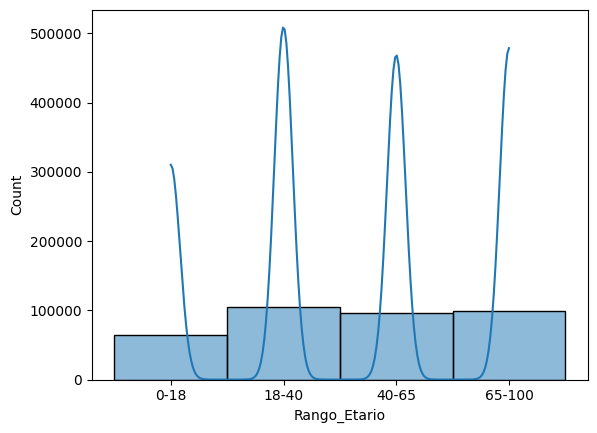

In [24]:
sns.histplot(data['Rango_Etario'], bins=30, kde=True)

In [25]:
#¿Existe una relación significativa entre el costo y la edad de los pacientes?
#H0: No existe relación significativa entre el costo y la edad de los pacientes
#H1: Existe relación significativa entre el costo y la edad de los pacientes
#Se utiliza la prueba de correlación de Pearson para determinar la relación entre las dos variables
correlation, p_value = stats.pearsonr(data['IR_29301_PESO'], data['EDAD'])
print(f"Correlation: {correlation}, P-value: {p_value}")
if p_value < 0.05:
    print("Rechazamos la hipótesis nula, existe una relación significativa entre el costo y la edad de los pacientes")
else:
    print("No se rechaza la hipótesis nula, no existe una relación significativa entre el costo y la edad de los pacientes")


Correlation: 0.2618753557672571, P-value: 0.0
Rechazamos la hipótesis nula, existe una relación significativa entre el costo y la edad de los pacientes


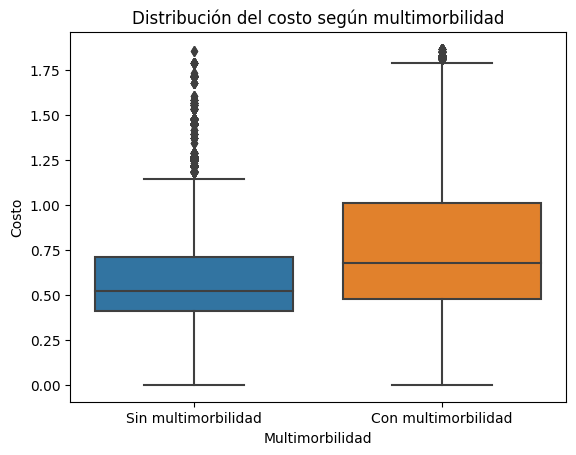

In [26]:
sns.boxplot(x='Multimorbilidad', y='IR_29301_PESO', data=data)
plt.xticks([0, 1], ['Sin multimorbilidad', 'Con multimorbilidad'])
plt.title('Distribución del costo según multimorbilidad')
plt.ylabel('Costo')
plt.xlabel('Multimorbilidad')
plt.show()

In [27]:
#¿Como distribuyen las personas con multimorbilidad en relación al costo?
#H0: No existe relación significativa entre el costo y la multimorbilidad
#H1: Existe relación significativa entre el costo y la multimorbilidad
#Se utiliza la prueba de correlación de Pearson para determinar la relación entre las dos variables

grupo_sin = data[data['Multimorbilidad'] == 0]['IR_29301_PESO']
grupo_con = data[data['Multimorbilidad'] == 1]['IR_29301_PESO']

t_stat, p_value = stats.ttest_ind(grupo_sin, grupo_con, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Rechazamos la hipótesis nula, existe una diferencia significativa en el costo entre personas con y sin multimorbilidad.")
else:
    print("No se rechaza la hipótesis nula, no existe una diferencia significativa en el costo entre personas con y sin multimorbilidad.")


T-statistic: -131.50925748713053, P-value: 0.0
Rechazamos la hipótesis nula, existe una diferencia significativa en el costo entre personas con y sin multimorbilidad.


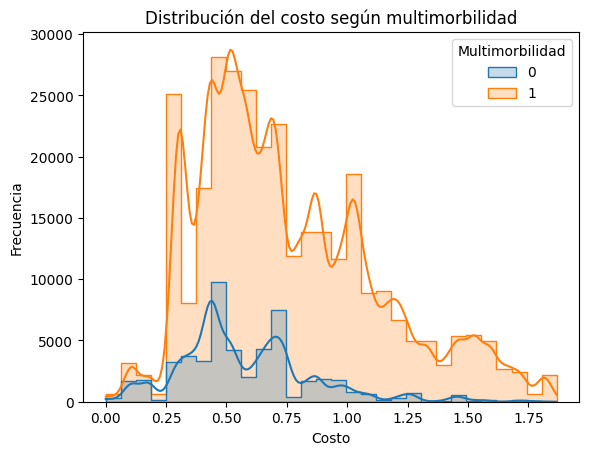

In [28]:
sns.histplot(data=data, x='IR_29301_PESO', hue='Multimorbilidad', kde=True, bins=30, element='step')
plt.title('Distribución del costo según multimorbilidad')
plt.xlabel('Costo')
plt.ylabel('Frecuencia')
plt.show()


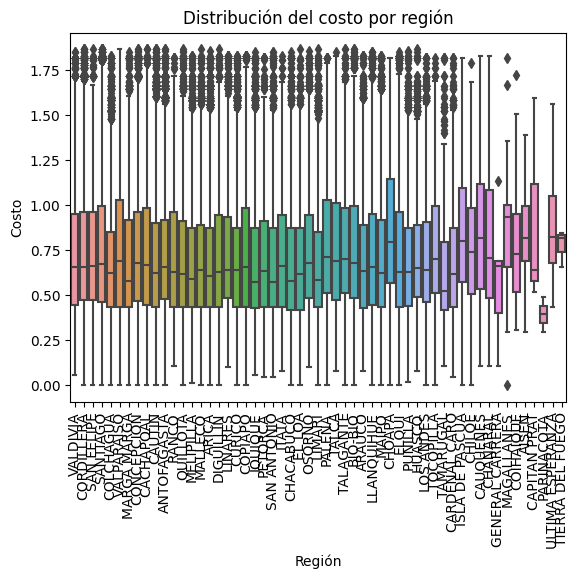

In [29]:
sns.boxplot(data=data, x='PROVINCIA', y='IR_29301_PESO')
plt.title('Distribución del costo por región')
plt.xticks(rotation=90)
plt.xlabel('Región')
plt.ylabel('Costo')
plt.show()

In [30]:
grupos = [grupo['IR_29301_PESO'].dropna() for _, grupo in data.groupby('PROVINCIA')]

#ANOVA
f_stat, p_value = stats.f_oneway(*grupos)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Rechazamos H0: Al menos una región tiene un costo significativamente diferente al promedio nacional.")
else:
    print("No se rechaza H0: No hay evidencia suficiente para afirmar diferencias entre regiones.")


F-statistic: 40.42427666976903, P-value: 0.0
Rechazamos H0: Al menos una región tiene un costo significativamente diferente al promedio nacional.


In [31]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=data['IR_29301_PESO'],
                          groups=data['PROVINCIA'],
                          alpha=0.05)
print(tukey)


          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------
           AISEN      ANTOFAGASTA  -0.1186    1.0 -0.4577  0.2206  False
           AISEN           ARAUCO  -0.1512    1.0 -0.4908  0.1883  False
           AISEN            ARICA  -0.1551    1.0 -0.4942   0.184  False
           AISEN          BIO-BIO  -0.0854    1.0 -0.4243  0.2536  False
           AISEN        CACHAPOAL  -0.0958    1.0 -0.4348  0.2432  False
           AISEN     CAPITAN PRAT   0.0708    1.0 -0.8463  0.9879  False
           AISEN    CARDENAL CARO  -0.1417    1.0 -0.4836  0.2003  False
           AISEN        CAUQUENES   0.0193    1.0 -0.3248  0.3633  False
           AISEN           CAUTIN  -0.1482    1.0 -0.4871  0.1906  False
           AISEN        CHACABUCO  -0.1745 0.9991  -0.514  0.1651  False
           AISEN         CHAÑARAL  -0.0564    1.0  

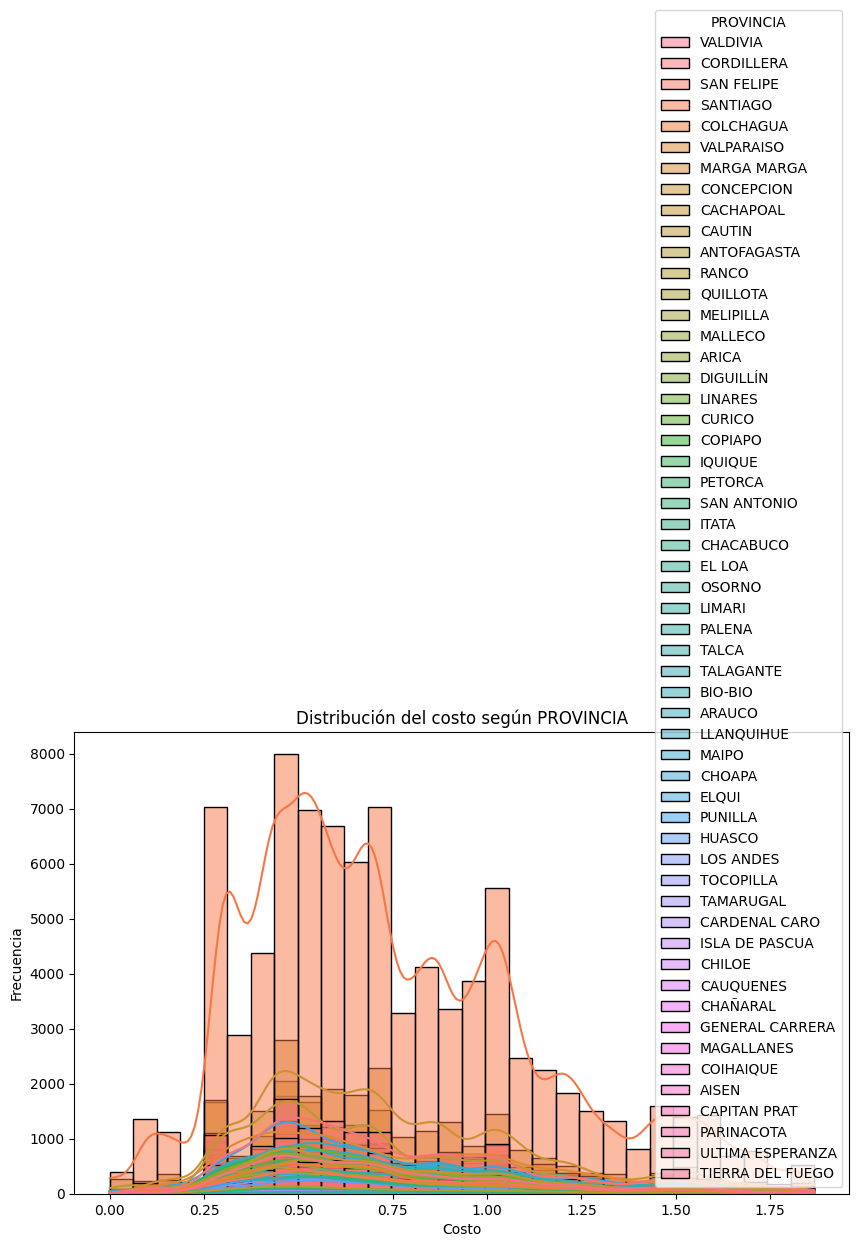

In [32]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=data, x='IR_29301_PESO', hue='PROVINCIA', kde=True, bins=30)
plt.title('Distribución del costo según PROVINCIA')
plt.xlabel('Costo')
plt.ylabel('Frecuencia')
plt.show()

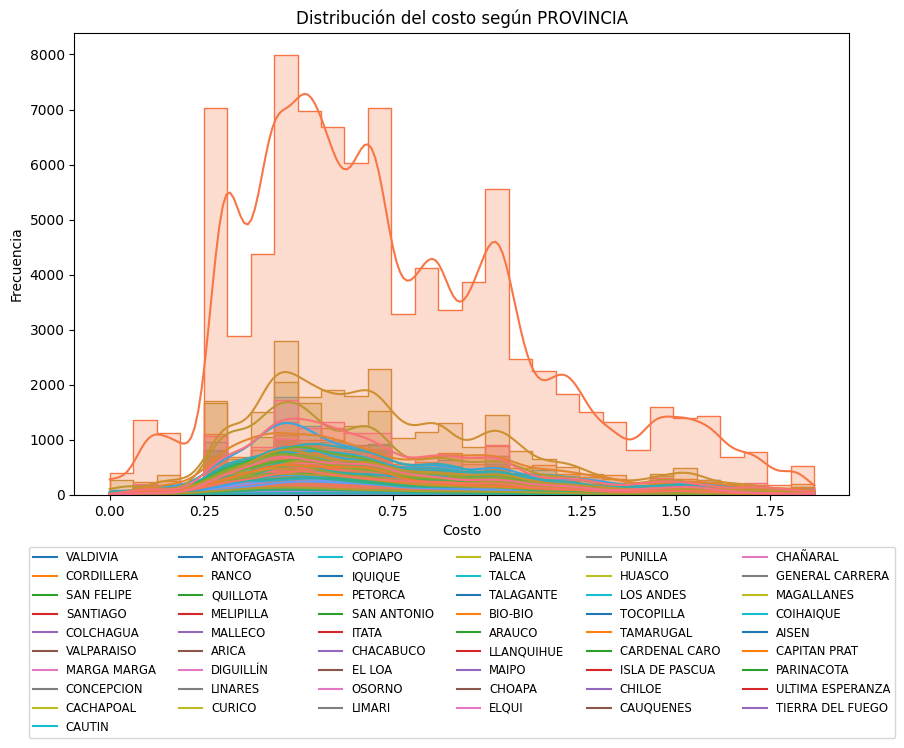

In [33]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=data, x='IR_29301_PESO', hue='PROVINCIA', kde=True, bins=30, element='step', legend=True)
plt.title('Distribución del costo según PROVINCIA')
plt.xlabel('Costo')
plt.ylabel('Frecuencia')

unique_labels = list(data['PROVINCIA'].unique())
palette = sns.color_palette(n_colors=len(unique_labels))

handles = [Line2D([0], [0], color=palette[i]) for i in range(len(unique_labels))]

ax.legend(handles=handles, labels=unique_labels, ncol=6, fontsize='small', loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.show()

T-statistic: -41.057679033033914, P-value: 0.0
Rechazamos la hipótesis nula, existe una diferencia significativa en el costo entre personas con y sin enfermedades cardiovasculares.


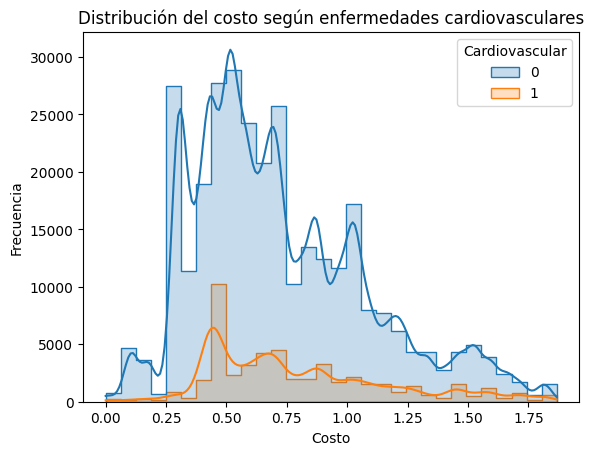

In [34]:
#eje x la edad
#en el eje y el peso medio
#dos curvas peso medio con weas cardiacas y la otra es peso medio sin weas cardiacas
#Como se distribuyen los csotos y las edades con pacientes con y sin enfermedades cardiacas
#¿Como distribuyen las personas con enfermedades cardiacas en relación al costo?
#H0: No existe relación significativa entre el costo y la enfermedad cardiaca
#H1: Existe relación significativa entre el costo y la enfermedad cardiaca
#Se utiliza la prueba de correlación de Pearson para determinar la relación entre las dos variables
grupo_sin = data[data['Cardiovascular'] == 0]['IR_29301_PESO']
grupo_con = data[data['Cardiovascular'] == 1]['IR_29301_PESO']
t_stat, p_value = stats.ttest_ind(grupo_sin, grupo_con, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("Rechazamos la hipótesis nula, existe una diferencia significativa en el costo entre personas con y sin enfermedades cardiovasculares.")
else:
    print("No se rechaza la hipótesis nula, no existe una diferencia significativa en el costo entre personas con y sin enfermedades cardiovasculares.")
sns.histplot(data=data, x='IR_29301_PESO', hue='Cardiovascular', kde=True, bins=30, element='step')
plt.title('Distribución del costo según enfermedades cardiovasculares')
plt.xlabel('Costo')
plt.ylabel('Frecuencia')
plt.show()



In [35]:
def Lowess_plot_cardiovascular(df, column1, column2, frac=0.2):
    for cardiopatia, color, label in zip([0, 1], ['blue', 'orange'], ['No', 'Sí']):
        subset = df[df['Cardiovascular'] == cardiopatia]
        x = subset[column1]
        y = subset[column2]

        lowess_result = sm.nonparametric.lowess(y, x, frac)
        x_lowess, y_lowess = lowess_result[:, 0], lowess_result[:, 1]

        plt.plot(x_lowess, y_lowess, label=f'Cardiopatía: {label}', color=color)

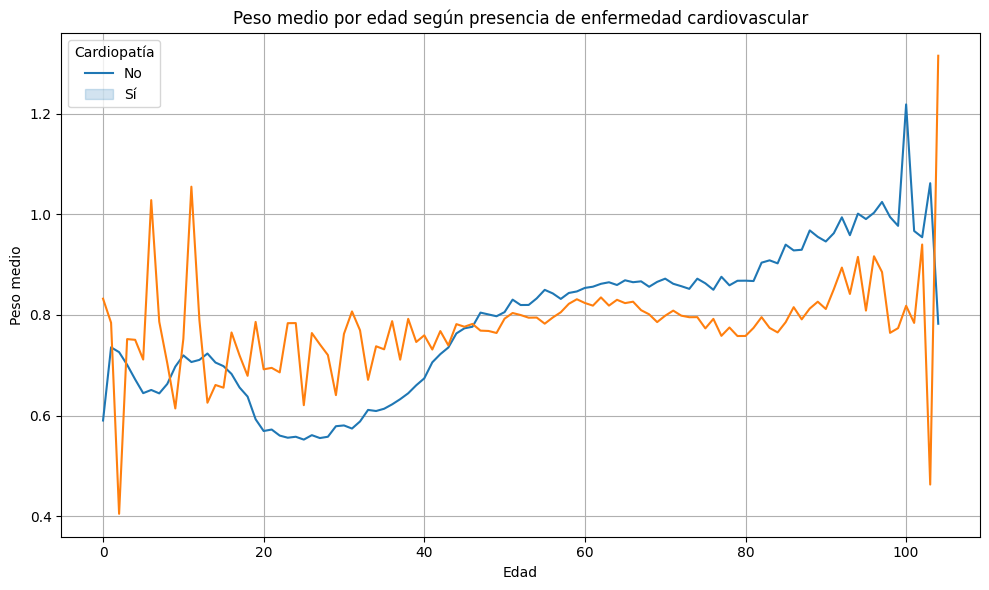

In [36]:
df = data.dropna(subset=['EDAD', 'IR_29301_PESO', 'Cardiovascular'])

media_por_edad = df.groupby(['EDAD', 'Cardiovascular'])['IR_29301_PESO'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=media_por_edad, x='EDAD', y='IR_29301_PESO', hue='Cardiovascular')

plt.title('Peso medio por edad según presencia de enfermedad cardiovascular')
plt.xlabel('Edad')
plt.ylabel('Peso medio')
plt.legend(title='Cardiopatía', labels=['No', 'Sí'])
plt.grid(True)
plt.tight_layout()
plt.show()

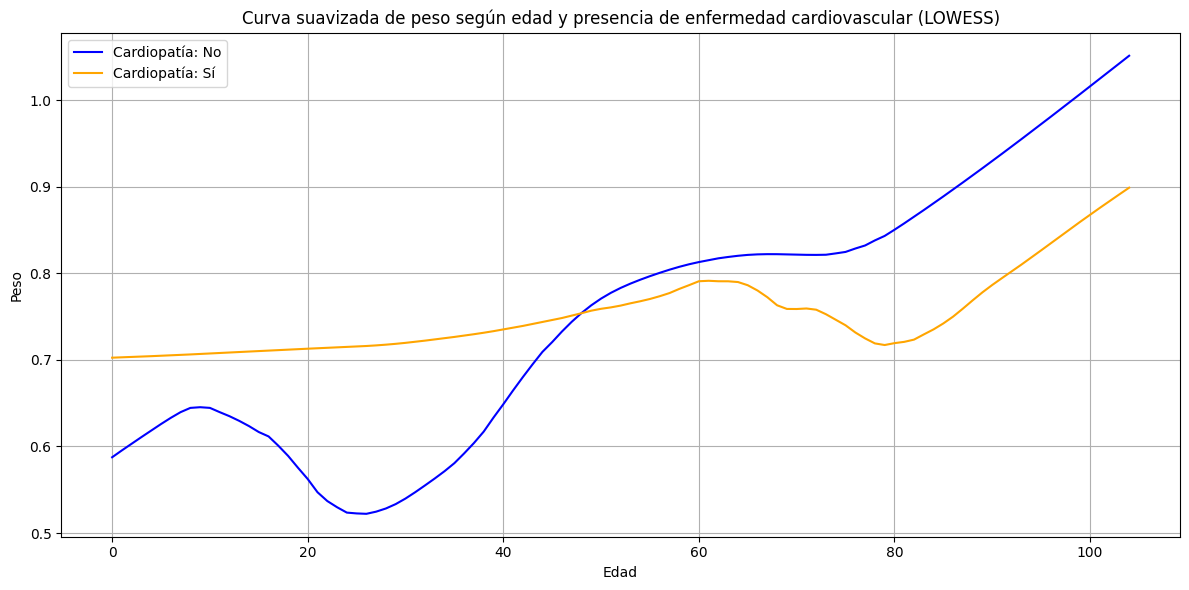

In [37]:

plt.figure(figsize=(12, 6))

Lowess_plot_cardiovascular(df, 'EDAD', 'IR_29301_PESO', frac=0.2)

plt.title('Curva suavizada de peso según edad y presencia de enfermedad cardiovascular (LOWESS)')
plt.xlabel('Edad')
plt.ylabel('Peso')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


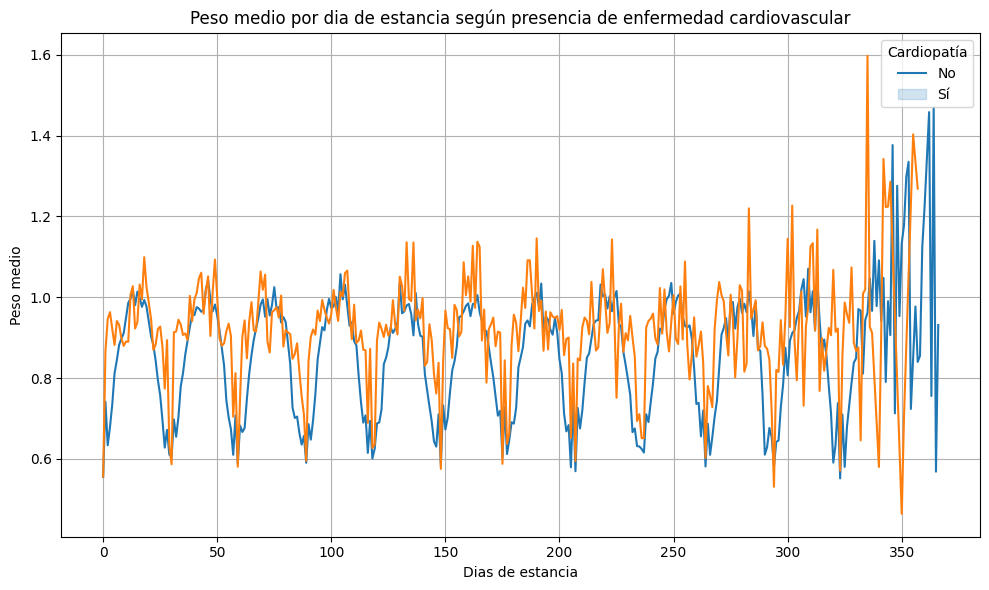

In [38]:
df = data.dropna(subset=['DIAS_ESTANCIA', 'IR_29301_PESO', 'Cardiovascular'])

media_por_edad = df.groupby(['DIAS_ESTANCIA', 'Cardiovascular'])['IR_29301_PESO'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=media_por_edad, x='DIAS_ESTANCIA', y='IR_29301_PESO', hue='Cardiovascular')

plt.title('Peso medio por dia de estancia según presencia de enfermedad cardiovascular')
plt.xlabel('Dias de estancia')
plt.ylabel('Peso medio')
plt.legend(title='Cardiopatía', labels=['No', 'Sí'])
plt.grid(True)
plt.tight_layout()
plt.show()

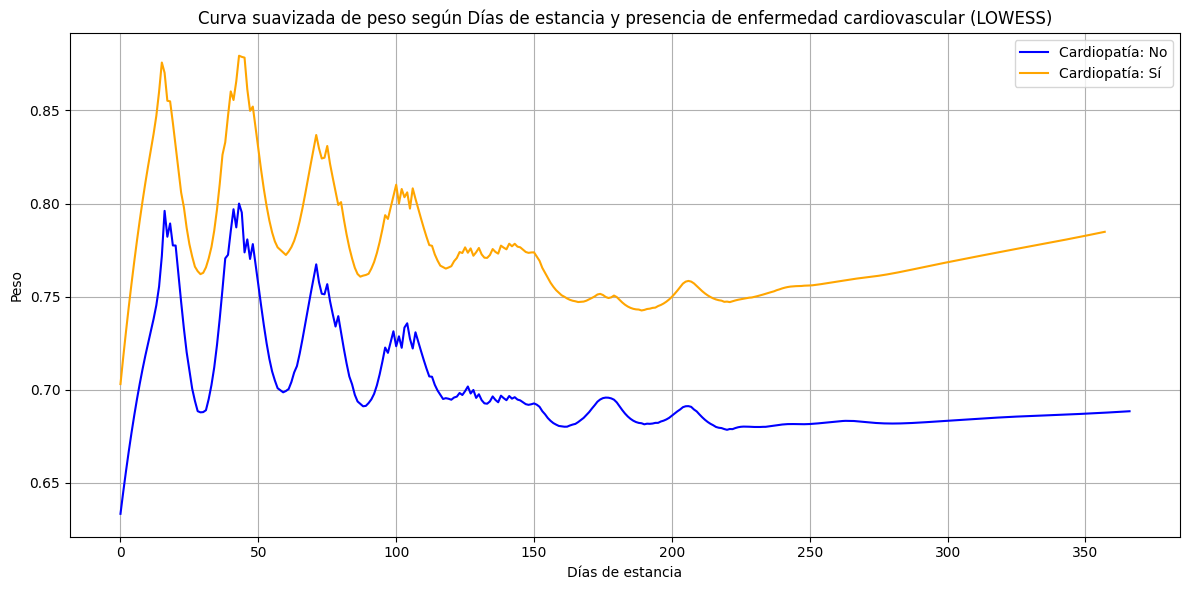

In [39]:
plt.figure(figsize=(12, 6))


Lowess_plot_cardiovascular(df, 'DIAS_ESTANCIA', 'IR_29301_PESO', frac=0.2)

plt.title('Curva suavizada de peso según Días de estancia y presencia de enfermedad cardiovascular (LOWESS)')
plt.xlabel('Días de estancia')
plt.ylabel('Peso')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


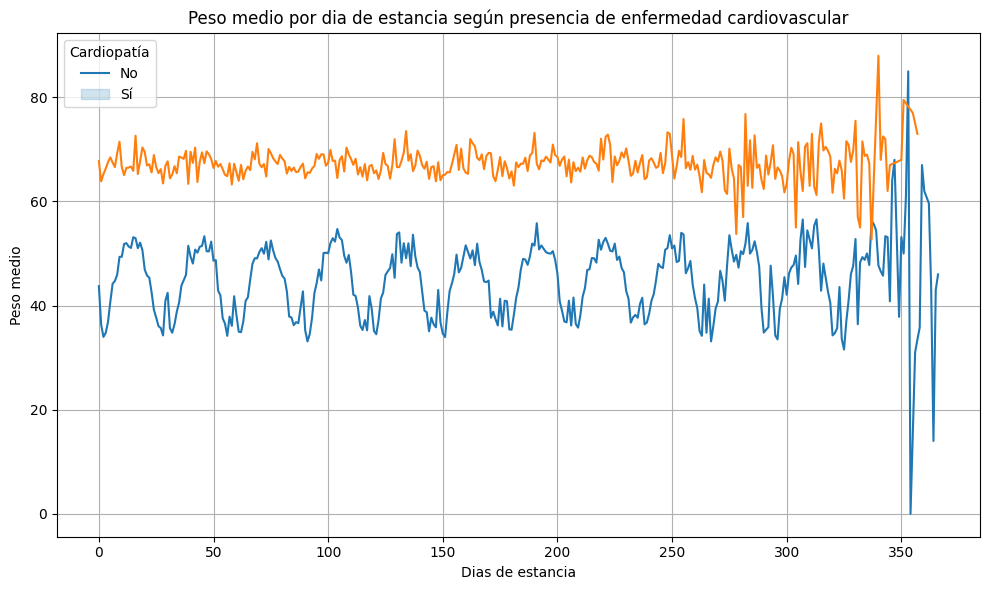

In [40]:
df = data.dropna(subset=['DIAS_ESTANCIA', 'EDAD', 'Cardiovascular'])

media_por_edad = df.groupby(['DIAS_ESTANCIA', 'Cardiovascular'])['EDAD'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=media_por_edad, x='DIAS_ESTANCIA', y='EDAD', hue='Cardiovascular')

plt.title('Peso medio por dia de estancia según presencia de enfermedad cardiovascular')
plt.xlabel('Dias de estancia')
plt.ylabel('Peso medio')
plt.legend(title='Cardiopatía', labels=['No', 'Sí'])
plt.grid(True)
plt.tight_layout()
plt.show()

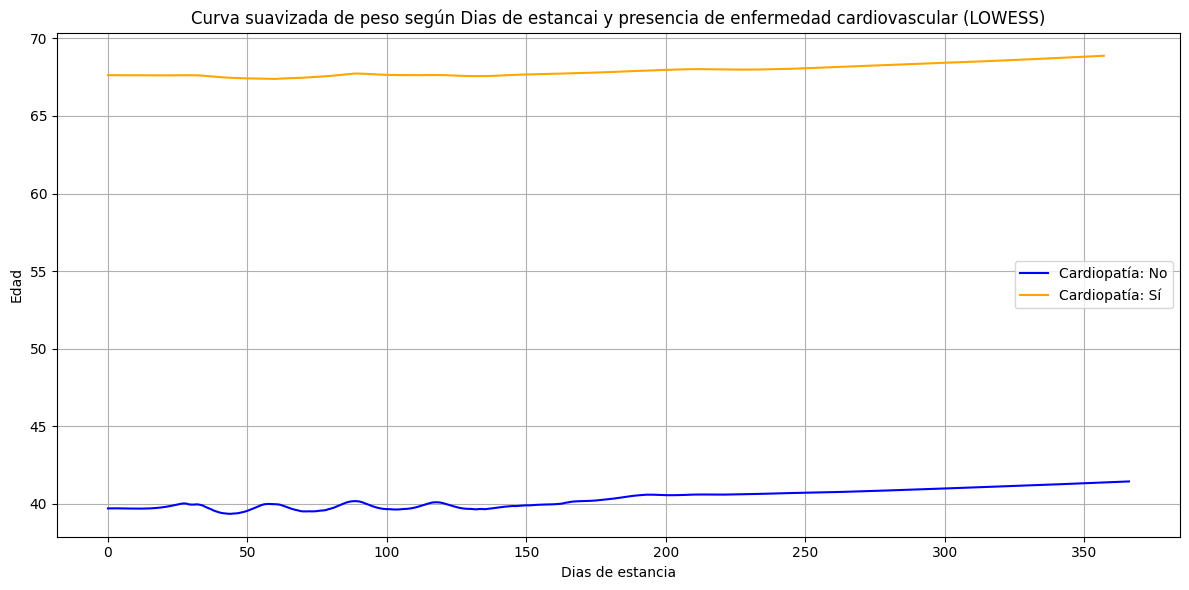

In [41]:
plt.figure(figsize=(12, 6))

Lowess_plot_cardiovascular(df, 'DIAS_ESTANCIA', 'EDAD', frac=0.3)
plt.title('Curva suavizada de peso según Dias de estancai y presencia de enfermedad cardiovascular (LOWESS)')
plt.xlabel('Dias de estancia')
plt.ylabel('Edad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

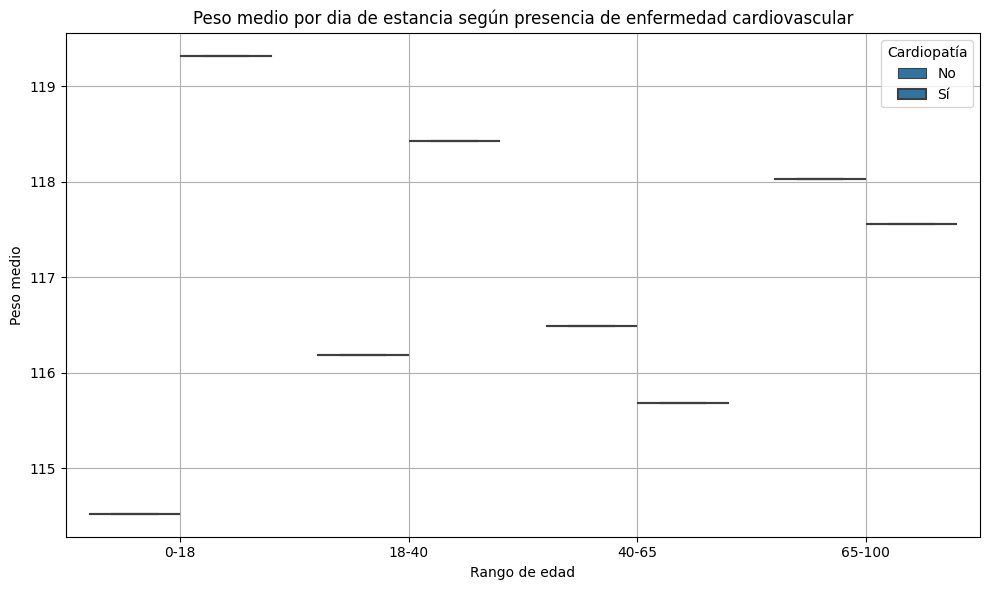

In [42]:

df = data.dropna(subset=['DIAS_ESTANCIA', 'Rango_Etario', 'Cardiovascular'])

media_por_edad = df.groupby(['Rango_Etario', 'Cardiovascular'])['DIAS_ESTANCIA'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.boxplot(data=media_por_edad, x='Rango_Etario', y='DIAS_ESTANCIA', hue='Cardiovascular')

plt.title('Peso medio por dia de estancia según presencia de enfermedad cardiovascular')
plt.xlabel('Rango de edad')
plt.ylabel('Peso medio')
plt.legend(title='Cardiopatía', labels=['No', 'Sí'])
plt.grid(True)
plt.tight_layout()
plt.show()

🔵 La edad donde comienza el crecimiento pronunciado es aproximadamente: 78.0 años (valor: 112.6)


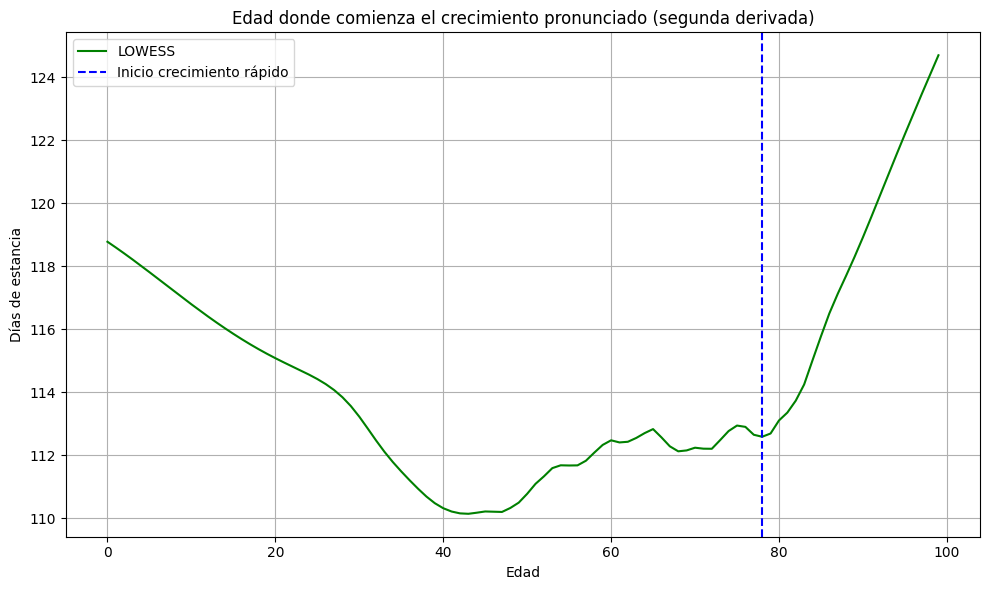

In [43]:
# Subset por grupo con cardiopatía
subset = df[df['Cardiovascular'] == 1]
x = subset['EDAD']
y = subset['DIAS_ESTANCIA']

# LOWESS suavizado
lowess_result = sm.nonparametric.lowess(y, x, frac=0.3, return_sorted=True)
x_smooth = lowess_result[:, 0]
y_smooth = lowess_result[:, 1]

# Eliminar duplicados en x para evitar división por cero
x_unique, idx_unique = np.unique(x_smooth, return_index=True)
y_unique = y_smooth[idx_unique]

# Limita el rango de análisis (ej. entre 60 y 80)
mask = (x_unique >= 60) & (x_unique <= 80)
x_range = x_unique[mask]
y_range = y_unique[mask]

# Primera derivada (pendiente)
dy_dx = np.gradient(y_range, x_range)

# Segunda derivada (cambio de la pendiente)
d2y_dx2 = np.gradient(dy_dx, x_range)

# Encontrar índice donde la segunda derivada es máxima: inicio de crecimiento rápido
inflexion_idx = np.argmax(d2y_dx2)
inflexion_x = x_range[inflexion_idx]
inflexion_y = y_range[inflexion_idx]

print(f"🔵 La edad donde comienza el crecimiento pronunciado es aproximadamente: {inflexion_x:.1f} años (valor: {inflexion_y:.1f})")

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, label='LOWESS', color='green')
plt.axvline(inflexion_x, color='blue', linestyle='--', label='Inicio crecimiento rápido')
plt.xlabel('Edad')
plt.ylabel('Días de estancia')
plt.title('Edad donde comienza el crecimiento pronunciado (segunda derivada)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


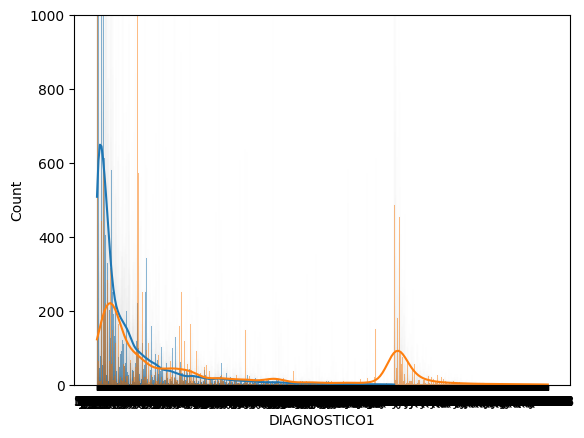

In [45]:
sns.histplot(data["DIAGNOSTICO1"],bins=30, kde=True)
sns.histplot(data["DIAGNOSTICO2"],bins=30, kde=True)
plt.ylim(0,1000)
plt.show()